In [77]:
import pandas as pd
import numpy as np
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sympy.physics.units import current

In [78]:
locale.setlocale(locale.LC_ALL, 'de_DE.UTF-8')

'de_DE.UTF-8'

In [79]:
tiker = "ALK"
df = pd.read_csv(f"stocks/data/{tiker}.csv")
print(df.isna().sum())
df.ffill(axis=0, inplace=True)
print(df.isna().sum())

Date                  0
last_traded_price     0
max                  51
min                  51
avg_price             0
promet                0
volume                0
promet_BEST           0
promet_vo_denari      0
dtype: int64
Date                 0
last_traded_price    0
max                  0
min                  0
avg_price            0
promet               0
volume               0
promet_BEST          0
promet_vo_denari     0
dtype: int64


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2679 non-null   object 
 1   last_traded_price  2679 non-null   object 
 2   max                2679 non-null   object 
 3   min                2679 non-null   object 
 4   avg_price          2679 non-null   object 
 5   promet             2679 non-null   object 
 6   volume             2679 non-null   float64
 7   promet_BEST        2679 non-null   object 
 8   promet_vo_denari   2679 non-null   object 
dtypes: float64(1), object(8)
memory usage: 188.5+ KB


In [81]:
df.head(20)

,Date,last_traded_price,max,min,avg_price,promet,volume,promet_BEST,promet_vo_denari
0,30.12.2014,"5.100,00","5.100,00","5.070,00","5.087,79","0,75",68.000,345.970,345.970
1,02.1.2014,"4.422,00","4.430,00","4.421,00","4.425,75","-1,58",110.000,486.832,486.832
2,03.1.2014,"4.500,00","4.500,00","4.422,00","4.479,75","1,22",191.000,855.633,855.633
3,08.1.2014,"4.450,00","4.500,00","4.410,00","4.488,90","0,20",486.000,2.181.606,2.181.606
4,09.1.2014,"4.400,00","4.500,00","4.400,00","4.471,61","-0,39",1.157,5.173.650,5.173.650
5,10.1.2014,"4.455,00","4.500,00","4.455,00","4.474,22","0,06",109.000,487.690,487.690
6,13.1.2014,"4.401,00","4.450,00","4.400,00","4.424,88","-1,10",244.000,1.079.670,1.079.670
7,14.1.2014,"4.430,00","4.430,00","4.428,00","4.429,54","0,11",182.000,806.177,806.177
8,15.1.2014,"4.430,00","4.430,00","4.430,00","4.430,00","0,01",50.000,221.500,221.500
9,16.1.2014,"4.402,00","4.430,00","4.400,00","4.404,10","-0,58",550.000,2.422.255,2.422.255


In [112]:
def parse_numeric_to_float(dataframe: pd.DataFrame):
    for col in dataframe.columns:
        if col=='Date':
            dataframe[col] = pd.to_datetime(dataframe[col], format='%d.%m.%Y')
        elif dataframe[col].dtype == 'object': 
            try:
                dataframe[col] = dataframe[col].apply(locale.atof).astype('float64')
            except:
                pass
            
parse_numeric_to_float(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2679 non-null   datetime64[ns]
 1   last_traded_price  2679 non-null   float64       
 2   max                2679 non-null   float64       
 3   min                2679 non-null   float64       
 4   avg_price          2679 non-null   float64       
 5   promet             2679 non-null   float64       
 6   volume             2679 non-null   float64       
 7   promet_BEST        2679 non-null   float64       
 8   promet_vo_denari   2679 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 188.5 KB


In [83]:
df.head()

,Date,last_traded_price,max,min,avg_price,promet,volume,promet_BEST,promet_vo_denari
0,30.12.2014,5100.0,5100.0,5070.0,5087.79,0.75,68.000,345970.0,345970.0
1,02.1.2014,4422.0,4430.0,4421.0,4425.75,-1.58,110.000,486832.0,486832.0
2,03.1.2014,4500.0,4500.0,4422.0,4479.75,1.22,191.000,855633.0,855633.0
3,08.1.2014,4450.0,4500.0,4410.0,4488.90,0.20,486.000,2181606.0,2181606.0
4,09.1.2014,4400.0,4500.0,4400.0,4471.61,-0.39,1.157,5173650.0,5173650.0


In [84]:
#Data preparation

#Postavuvanje na target
target = 'avg_price'
#Atributi za shiftanje
attributes = df.columns[1:]
attributes = ['max','min','avg_price' ]
#inicijalizacija na lag
lag = 7
#broj na atributi (originalno)
n_features = len(attributes)
# n_features = 1 #ako vo trening koristime samo 1 atribut
#dodavanje na lag na atributite
def drop_columns(dataframe: pd.DataFrame, columns):
    to_delete = [col for col in dataframe.columns if col not in columns]
    return dataframe.drop(to_delete, axis=1)


def shift_attributes_by_x(dataframe: pd.DataFrame, attributes, x:int):
    copy = dataframe.copy()
    for i in range(x, 0, -1):
        for attr in attributes:
            lag = attr+'_lag_'+str(i)
            copy[lag] = copy[attr].shift(i)
    copy.dropna(inplace=True)
    return copy
    
#reshape na originalnoto treniracko mnozestvo za da moze da se koristi vo LSTM-modelot
def reshape(X:pd.DataFrame, time_step):
    # scaler = StandardScaler()
    # tmp = scaler.fit_transform(X)
    tmp = X.to_numpy()
    reshaped = tmp.reshape(tmp.shape[0], time_step, n_features)
    return reshaped

#agregiranje na podatocite na nivo na mesec
def group_by_month(dataframe: pd.DataFrame):    
    by_month = dataframe.copy()
    by_month['Date'] = pd.to_datetime(by_month['Date'], dayfirst=True)
    by_month = by_month.groupby(pd.Grouper(key='Date', freq='ME')).agg({
        'last_traded_price': 'last',       # Last closing value of the month
        'max': 'max',         # Maximum high of the month
        'min': 'min',          # Minimum low of the month
        'avg_price': 'mean',    #average per month
        'promet': 'mean',
        'volume': 'sum',    # Total BTC volume for the month
        'promet_BEST': 'sum',     # Total USD volume for the month
        'promet_vo_denari': 'sum'     # Total USD volume for the month
        
    })
    return by_month

reduced_dataset = drop_columns(df, attributes)
df_shifted_7d = shift_attributes_by_x(reduced_dataset, attributes, lag)
#prvo da se zeme target kolonata pred da ja trgneme od trening datasetot
test = df_shifted_7d[target]
#trganje na orginalnite koloni od datasetot
df_shifted_7d.drop(attributes, axis=1, inplace=True)
df_shifted_7d.head(20)
    

,max_lag_7,min_lag_7,avg_price_lag_7,max_lag_6,min_lag_6,avg_price_lag_6,max_lag_5,min_lag_5,avg_price_lag_5,max_lag_4,...,avg_price_lag_4,max_lag_3,min_lag_3,avg_price_lag_3,max_lag_2,min_lag_2,avg_price_lag_2,max_lag_1,min_lag_1,avg_price_lag_1
7,5100.0,5070.0,5087.79,4430.0,4421.0,4425.75,4500.0,4422.0,4479.75,4500.0,...,4488.90,4500.0,4400.0,4471.61,4500.0,4455.0,4474.22,4450.0,4400.0,4424.88
8,4430.0,4421.0,4425.75,4500.0,4422.0,4479.75,4500.0,4410.0,4488.90,4500.0,...,4471.61,4500.0,4455.0,4474.22,4450.0,4400.0,4424.88,4430.0,4428.0,4429.54
9,4500.0,4422.0,4479.75,4500.0,4410.0,4488.90,4500.0,4400.0,4471.61,4500.0,...,4474.22,4450.0,4400.0,4424.88,4430.0,4428.0,4429.54,4430.0,4430.0,4430.00
10,4500.0,4410.0,4488.90,4500.0,4400.0,4471.61,4500.0,4455.0,4474.22,4450.0,...,4424.88,4430.0,4428.0,4429.54,4430.0,4430.0,4430.00,4430.0,4400.0,4404.10
11,4500.0,4400.0,4471.61,4500.0,4455.0,4474.22,4450.0,4400.0,4424.88,4430.0,...,4429.54,4430.0,4430.0,4430.00,4430.0,4400.0,4404.10,4420.0,4401.0,4407.58
12,4500.0,4455.0,4474.22,4450.0,4400.0,4424.88,4430.0,4428.0,4429.54,4430.0,...,4430.00,4430.0,4400.0,4404.10,4420.0,4401.0,4407.58,4430.0,4402.0,4427.43
13,4450.0,4400.0,4424.88,4430.0,4428.0,4429.54,4430.0,4430.0,4430.00,4430.0,...,4404.10,4420.0,4401.0,4407.58,4430.0,4402.0,4427.43,4420.0,4405.0,4416.56
14,4430.0,4428.0,4429.54,4430.0,4430.0,4430.00,4430.0,4400.0,4404.10,4420.0,...,4407.58,4430.0,4402.0,4427.43,4420.0,4405.0,4416.56,4425.0,4420.0,4422.88
15,4430.0,4430.0,4430.00,4430.0,4400.0,4404.10,4420.0,4401.0,4407.58,4430.0,...,4427.43,4420.0,4405.0,4416.56,4425.0,4420.0,4422.88,4430.0,4421.0,4421.77
16,4430.0,4400.0,4404.10,4420.0,4401.0,4407.58,4430.0,4402.0,4427.43,4420.0,...,4416.56,4425.0,4420.0,4422.88,4430.0,4421.0,4421.77,4450.0,4450.0,4450.00


In [85]:
only_target = pd.DataFrame(df[target])
only_target_shifted_7d = shift_attributes_by_x(only_target, [target], lag)
only_target_shifted_7d.drop(columns=[target], inplace=True)
only_target_shifted_7d.head(7)

,avg_price_lag_7,avg_price_lag_6,avg_price_lag_5,avg_price_lag_4,avg_price_lag_3,avg_price_lag_2,avg_price_lag_1
7,5087.79,4425.75,4479.75,4488.90,4471.61,4474.22,4424.88
8,4425.75,4479.75,4488.90,4471.61,4474.22,4424.88,4429.54
9,4479.75,4488.90,4471.61,4474.22,4424.88,4429.54,4430.00
10,4488.90,4471.61,4474.22,4424.88,4429.54,4430.00,4404.10
11,4471.61,4474.22,4424.88,4429.54,4430.00,4404.10,4407.58
12,4474.22,4424.88,4429.54,4430.00,4404.10,4407.58,4427.43
13,4424.88,4429.54,4430.00,4404.10,4407.58,4427.43,4416.56


In [86]:
test.tail()

2674    22484.06
2675    22997.62
2676    23193.84
2677    23432.42
2678    23793.41
Name: avg_price, dtype: float64

In [87]:
train = df_shifted_7d

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, shuffle=False)
#Reshape na X
x_train = reshape(x_train, lag)
x_test = reshape(x_test, lag)

In [88]:
print("X Training shape: "+str(x_train.shape))
print("X Testing shape: "+str(x_test.shape))
print("y Training shape: "+str(y_train.shape))
print("y Testing shape: "+str(y_test.shape))

X Training shape: (1870, 7, 3)
X Testing shape: (802, 7, 3)
y Training shape: (1870,)
y Testing shape: (802,)


In [103]:
x_train

array([[[ 5100.  ,  5070.  ,  5087.79],
        [ 4430.  ,  4421.  ,  4425.75],
        [ 4500.  ,  4422.  ,  4479.75],
        ...,
        [ 4500.  ,  4400.  ,  4471.61],
        [ 4500.  ,  4455.  ,  4474.22],
        [ 4450.  ,  4400.  ,  4424.88]],

       [[ 4430.  ,  4421.  ,  4425.75],
        [ 4500.  ,  4422.  ,  4479.75],
        [ 4500.  ,  4410.  ,  4488.9 ],
        ...,
        [ 4500.  ,  4455.  ,  4474.22],
        [ 4450.  ,  4400.  ,  4424.88],
        [ 4430.  ,  4428.  ,  4429.54]],

       [[ 4500.  ,  4422.  ,  4479.75],
        [ 4500.  ,  4410.  ,  4488.9 ],
        [ 4500.  ,  4400.  ,  4471.61],
        ...,
        [ 4450.  ,  4400.  ,  4424.88],
        [ 4430.  ,  4428.  ,  4429.54],
        [ 4430.  ,  4430.  ,  4430.  ]],

       ...,

       [[15878.  , 15761.  , 15777.06],
        [15800.  , 15799.  , 15799.93],
        [15900.  , 15800.  , 15810.  ],
        ...,
        [15850.  , 15800.  , 15823.48],
        [16000.  , 15900.  , 15983.12],
        [

In [105]:
x_test[-5:]

array([[[22350.  , 22250.  , 22266.81],
        [22260.  , 22200.  , 22252.  ],
        [22250.  , 22250.  , 22250.  ],
        [22310.  , 22250.  , 22291.33],
        [22351.  , 22300.  , 22316.35],
        [22300.  , 22250.  , 22293.98],
        [22300.  , 22298.  , 22299.74]],

       [[22260.  , 22200.  , 22252.  ],
        [22250.  , 22250.  , 22250.  ],
        [22310.  , 22250.  , 22291.33],
        [22351.  , 22300.  , 22316.35],
        [22300.  , 22250.  , 22293.98],
        [22300.  , 22298.  , 22299.74],
        [22502.  , 22301.  , 22484.06]],

       [[22250.  , 22250.  , 22250.  ],
        [22310.  , 22250.  , 22291.33],
        [22351.  , 22300.  , 22316.35],
        [22300.  , 22250.  , 22293.98],
        [22300.  , 22298.  , 22299.74],
        [22502.  , 22301.  , 22484.06],
        [23000.  , 22990.  , 22997.62]],

       [[22310.  , 22250.  , 22291.33],
        [22351.  , 22300.  , 22316.35],
        [22300.  , 22250.  , 22293.98],
        [22300.  , 22298.  , 22299

In [99]:
#Pravenje na model
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

#instanciranje na modelot
model = Sequential([
    Input((lag, n_features)),
    LSTM(56, activation='relu'),
    Dense(1)
])

model.compile(loss="mse", optimizer="adam")

history = model.fit(x_train, y_train, validation_split=0.1, epochs=70, batch_size=8)


Epoch 1/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3495269.0000 - val_loss: 233507.1719
Epoch 2/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 63039.5938 - val_loss: 220241.1406
Epoch 3/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 54558.3672 - val_loss: 214443.7500
Epoch 4/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40408.7695 - val_loss: 209084.0000
Epoch 5/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66420.7344 - val_loss: 208030.0156
Epoch 6/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71928.7969 - val_loss: 208172.4844
Epoch 7/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 50528.8594 - val_loss: 307697.5938
Epoch 8/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76002.6875 - val_loss: 265050.5312
Epoch 9/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49109.2773 - val_loss: 233722.0312
Epoch 10/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75246.2344 - val_loss: 204651.9219
Epoch 11/70
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

In [100]:
pred = model.predict(x_test)
print(pred[4])

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[15844.933]


In [101]:
r2_score(y_test, pred)

0.9267452886356081

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


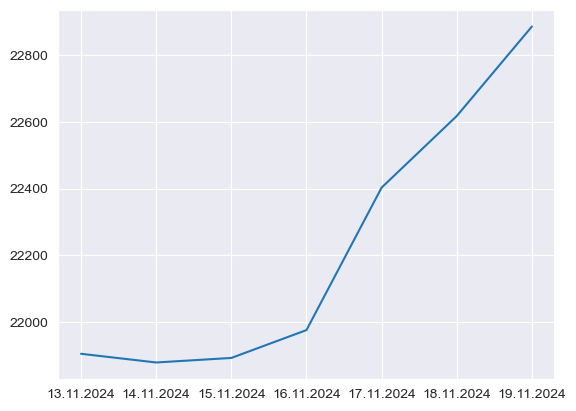

In [122]:
from datetime import timedelta

n=7
current_date = df['Date'][len(df)-1]
next_n_days = [(current_date + timedelta(days=i)).strftime("%d.%m.%Y") for i in range(1, n+1)]
next_predicted_n_days = model.predict(x_test[n*(-1):])
plt.plot(next_n_days, next_predicted_n_days)

<Axes: xlabel='Date', ylabel='avg_price'>

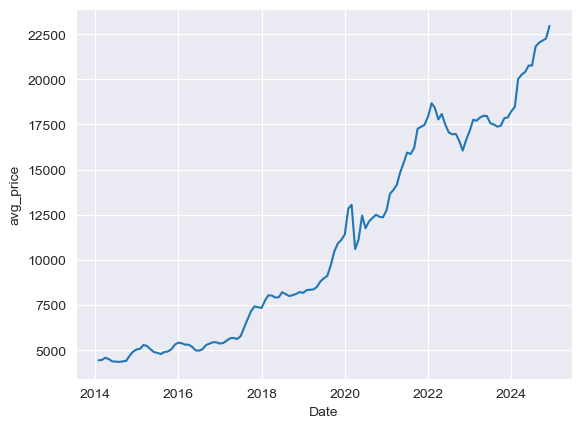

In [95]:
byMonth = group_by_month(df)
sns.lineplot(data=byMonth, x='Date', y='avg_price')